****Import the required Libraries****

In [1]:
# Importing the Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import bz2
import re
import os
import gc

In [2]:
# Read the train and test data
train_data = bz2.BZ2File("/kaggle/input/amazonreviews/train.ft.txt.bz2")
test_data = bz2.BZ2File("/kaggle/input/amazonreviews/test.ft.txt.bz2")

In [3]:
#extracting .bz2 file into list of texts and labels
def load_extract(file):
    texts, labels = [], []
    for line in file:
        x = line.decode('utf-8')
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    print("Done")
    return np.array(labels), texts

In [4]:
train_labels, train_text = load_extract(train_data)
test_labels, test_text = load_extract(test_data)

Done
Done


In [5]:
#example of text in dataset
train_labels[1]

1

**Preprocessing the text**

In [6]:
import nltk
from nltk.corpus import stopwords

**Using regex to remove unnecessary keywords and symbols and cleaning the text**

In [7]:
def clean_texts(texts):
    stwords = stopwords.words('english')
    l = len(texts)/10
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d', '0', texts[i])
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text:
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords]
        
        text = ' '.join(text)
        temp_texts.append(text)
        if i%l==0:
            print('--'+str(int(i/l)*10)+'%', end='')
    print('--100%--Done !')
    return temp_texts

In [8]:
print('Processing Training data')
train_texts = clean_texts(train_text)
print('\nProcessing Test data')
test_texts = clean_texts(test_text)

Processing Training data
--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !

Processing Test data
--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !


<AxesSubplot:ylabel='count'>

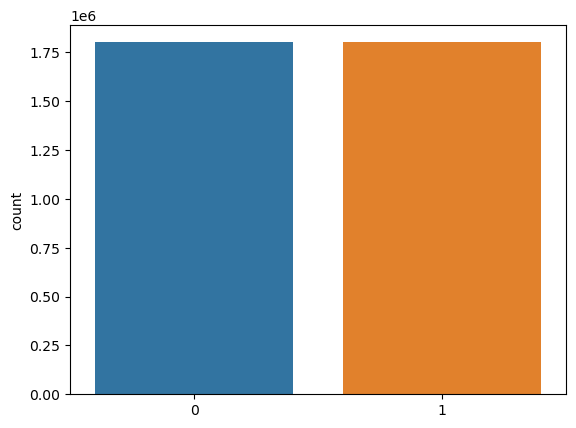

In [9]:
sns.countplot(x=train_labels)

**Vectorize the text for model to train**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train_texts) ; print('fit complete !')

print("transforming training set")
train_texts_vec = count_vect.transform(train_texts)

print("transforming test set")
test_texts_vec = count_vect.transform(test_texts)

Fitting data...
fit complete !
transforming training set
transforming test set


**Naive Bayes Model**

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_texts_vec, train_labels)

MultinomialNB()

In [12]:
y_pred = nb.predict(test_texts_vec)

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(test_labels, y_pred))

Accuracy:  0.8491875


****Logistic Regression Model****

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(n_jobs=-1, max_iter=150)
lr_model.fit(train_texts_vec, train_labels
            )

LogisticRegression(max_iter=150, n_jobs=-1)

In [15]:
pred_lr = lr_model.predict(test_texts_vec)

In [16]:
print("Accuracy:", accuracy_score(test_labels, pred_lr
                                 ))

Accuracy: 0.90045


In [17]:
sample = test_texts[100]
print(sample)

sample_vec = count_vect.transform([sample])
pred = lr_model.predict(sample_vec)
print('\npredicted label:',pred[0])
print('actual label:', test_labels[100])

problems munchkin version ditto complaints separate easily either unscrewing prizing cheap flimsy leaks water also gasket looking something else hoping reviewers give honest good advice almost identical product munchkin

predicted label: 0
actual label: 0


**Save the Model**

In [18]:
import joblib

joblib.dump(lr_model, 'model_joblib.pkl')
joblib.dump(count_vect, 'count_vect_joblib.pkl')

['count_vect_joblib.pkl']